# Stack Overflow Developer Survey, 2017

## The CRISP-DM Process 

1. Business Understanding

2. Data Understanding

3. Prepare Data

4. Data Modeling

5. Evaluate the Results

# 1. Business Understanding
 
In this project I will try to answer the folowing question based on "Stack Overflow Developer Survey, 2017"

1. what is the most popular language and is there any new trending language?

2. Is graduate from computer related field have higher salary? 'MajorUndergrad' compare to salary?

3. What country has the highest average salary per professional?


# 2. Data Understanding
Before we start we need to understand the data. In this section we will take a look at some of the characteristics of the dataset.

We have 51392 raws and 154 coloums in this dataset. We have 7 columns that have no missing value and 10 columns that have more than 7 missing values. 

### I will use:
- `HaveWorkedLanguage` and `WantWorkLanguage` for the 1st question
- `MajorUndergrad` and `Salary` for the 2nd question
- `Country`, `Professional`, and `Salary` for the 3rd question

In [14]:
# read necessary librarieload
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import helper as h
from collections import defaultdict

%matplotlib inline

In [15]:
#read in the data
df = pd.read_csv('data/survey_results_public.csv')
schema = pd.read_csv('data/survey_results_schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


In [17]:
df.shape

(51392, 154)

In [18]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


In [19]:
for col in df.columns: 
    print(col)

Respondent
Professional
ProgramHobby
Country
University
EmploymentStatus
FormalEducation
MajorUndergrad
HomeRemote
CompanySize
CompanyType
YearsProgram
YearsCodedJob
YearsCodedJobPast
DeveloperType
WebDeveloperType
MobileDeveloperType
NonDeveloperType
CareerSatisfaction
JobSatisfaction
ExCoderReturn
ExCoderNotForMe
ExCoderBalance
ExCoder10Years
ExCoderBelonged
ExCoderSkills
ExCoderWillNotCode
ExCoderActive
PronounceGIF
ProblemSolving
BuildingThings
LearningNewTech
BoringDetails
JobSecurity
DiversityImportant
AnnoyingUI
FriendsDevelopers
RightWrongWay
UnderstandComputers
SeriousWork
InvestTimeTools
WorkPayCare
KinshipDevelopers
ChallengeMyself
CompetePeers
ChangeWorld
JobSeekingStatus
HoursPerWeek
LastNewJob
AssessJobIndustry
AssessJobRole
AssessJobExp
AssessJobDept
AssessJobTech
AssessJobProjects
AssessJobCompensation
AssessJobOffice
AssessJobCommute
AssessJobRemote
AssessJobLeaders
AssessJobProfDevel
AssessJobDiversity
AssessJobProduct
AssessJobFinances
ImportantBenefits
ClickyKeys
Jo

In [20]:
no_nulls = set(df.columns[df.isnull().mean()==0])#Provide a set of columns with 0 missing values.
no_nulls

{'Country',
 'EmploymentStatus',
 'FormalEducation',
 'Professional',
 'ProgramHobby',
 'Respondent',
 'University'}

In [21]:
len(no_nulls)

7

In [22]:
most_missing_cols = set(df.columns[df.isnull().mean() > 0.75])#Provide a set of columns with more than 75% of the values missing
most_missing_cols

{'ExCoder10Years',
 'ExCoderActive',
 'ExCoderBalance',
 'ExCoderBelonged',
 'ExCoderNotForMe',
 'ExCoderReturn',
 'ExCoderSkills',
 'ExCoderWillNotCode',
 'ExpectedSalary',
 'MobileDeveloperType',
 'NonDeveloperType',
 'TimeAfterBootcamp',
 'WebDeveloperType',
 'YearsCodedJobPast'}

In [23]:
len(most_missing_cols)

14

# 3. Prepare Data

I want to have a subset of the data for each question so the other will not affectd by dropping rows


#### let look at the description of each column:

In [64]:
print('HaveWorkedLanguage:   {}'.format(h.get_description('HaveWorkedLanguage')))
print('WantWorkLanguage:   {}'.format(h.get_description('WantWorkLanguage')))
print('MajorUndergrad:   {}'.format(h.get_description('MajorUndergrad')))
print('Salary:   {}'.format(h.get_description('Salary')))
print('Country:   {}'.format(h.get_description('Country')))
print('Professional:   {}'.format(h.get_description('Professional')))


HaveWorkedLanguage:   Which of the following languages have you done extensive development work in over the past year, and which do you want to work in over the next year?
WantWorkLanguage:   Which of the following languages have you done extensive development work in over the past year, and which do you want to work in over the next year?
MajorUndergrad:   Which of the following best describes your main field of study (aka 'major') in college or university/for your undergraduate studies?
Salary:   What is your current annual base salary, before taxes, and excluding bonuses, grants, or other compensation?
Country:   In which country do you currently live?
Professional:   Which of the following best describes you?


In [25]:
# Check if we have a duplicated raws
sum(df.duplicated())

0

## Q1: what is the most popular language and is there any new trending language?

##### We will get the unique values of HaveWordedLanguage and  WantWorkLanguage.

In [26]:
# HaveWordedLanguage
HaveWordedLanguage = pd.read_csv('data/HaveWordedLanguage.csv')
HaveWordedLanguage.replace('nan', np.nan, inplace = True)
HaveWordedLanguage =  HaveWordedLanguage.drop_duplicates()
HaveWordedLanguage = HaveWordedLanguage.dropna()
HaveWordedLanguage.head()

,HaveWorkedLanguage
0,Swift
1,JavaScript; Python; Ruby; SQL
2,Java; PHP; Python
3,Matlab; Python; R; SQL
5,JavaScript; PHP; Rust


In [27]:
#WantWorkLanguage
WantWorkLanguage = pd.read_csv('data/WantWorkLanguage.csv')
WantWorkLanguage.replace('nan', np.nan, inplace = True)
WantWorkLanguage =  WantWorkLanguage.drop_duplicates()
WantWorkLanguage = WantWorkLanguage.dropna()
WantWorkLanguage.head()

,WantWorkLanguage
0,Swift
1,Java; Python; Ruby; SQL
2,C; Python; Rust
3,Matlab; Python; R; SQL
5,Clojure; Elixir; Erlang; Haskell; Rust; TypeSc...


In [28]:
#HaveWordedLanguage
have_list_value = []
for index, row in HaveWordedLanguage.iterrows():
    values = row.str.split('; ')
    for value in values:
        have_list_value = have_list_value + value
print(have_list_value)        

['Swift', 'JavaScript', 'Python', 'Ruby', 'SQL', 'Java', 'PHP', 'Python', 'Matlab', 'Python', 'R', 'SQL', 'JavaScript', 'PHP', 'Rust', 'Matlab', 'Python', 'CoffeeScript', 'Clojure', 'Elixir', 'Erlang', 'Haskell', 'JavaScript', 'Python', 'Ruby', 'C#', 'JavaScript', 'Objective-C', 'Swift', 'R', 'SQL', 'C', 'C++', 'Java', 'Java', 'JavaScript', 'Ruby', 'SQL', 'Assembly', 'C', 'C++', 'JavaScript', 'VB.NET', 'JavaScript', 'C', 'Clojure', 'JavaScript', 'Matlab', 'Rust', 'SQL', 'Swift', 'Perl', 'Python', 'C#', 'JavaScript', 'SQL', 'Java', 'PHP', 'SQL', 'Java', 'Scala', 'Java', 'JavaScript', 'Objective-C', 'Python', 'Swift', 'JavaScript', 'Python', 'C#', 'Java', 'Assembly', 'C', 'C#', 'JavaScript', 'Matlab', 'Python', 'R', 'C#', 'F#', 'JavaScript', 'SQL', 'C#', 'Java', 'JavaScript', 'C#', 'JavaScript', 'SQL', 'TypeScript', 'C', 'C++', 'JavaScript', 'Lua', 'Python', 'Java', 'JavaScript', 'SQL', 'Java', 'JavaScript', 'SQL', 'VBA', 'C', 'C++', 'Groovy', 'Java', 'Python', 'C++', 'C#', 'Java', 'Java

In [29]:
#WantWorkLanguage
want_list_value = []
for index, row in WantWorkLanguage.iterrows():
    values = row.str.split('; ')
    for value in values:
        want_list_value = want_list_value + value
print(want_list_value)

['Swift', 'Java', 'Python', 'Ruby', 'SQL', 'C', 'Python', 'Rust', 'Matlab', 'Python', 'R', 'SQL', 'Clojure', 'Elixir', 'Erlang', 'Haskell', 'Rust', 'TypeScript', 'JavaScript', 'Julia', 'Matlab', 'Python', 'R', 'SQL', 'Clojure', 'Elixir', 'Haskell', 'Scala', 'F#', 'Go', 'C#', 'Java', 'Objective-C', 'Swift', 'C#', 'R', 'SQL', 'JavaScript', 'Ruby', 'Rust', 'Swift', 'Assembly', 'C', 'C++', 'Python', 'C#', 'F#', 'JavaScript', 'R', 'VB.NET', 'Clojure', 'Assembly', 'Clojure', 'Go', 'JavaScript', 'Rust', 'Swift', 'TypeScript', 'Perl', 'Python', 'C#', 'R', 'TypeScript', 'Java', 'Scala', 'Swift', 'Hack', 'JavaScript', 'PHP', 'SQL', 'Swift', 'JavaScript', 'Scala', 'Go', 'Java', 'JavaScript', 'R', 'Swift', 'JavaScript', 'C++', 'C#', 'Haskell', 'Haskell', 'Python', 'R', 'Rust', 'TypeScript', 'C++', 'Elixir', 'Python', 'JavaScript', 'Python', 'R', 'C#', 'F#', 'SQL', 'TypeScript', 'C#', 'JavaScript', 'C#', 'F#', 'Haskell', 'TypeScript', 'C++', 'Lua', 'R', 'C++', 'C#', 'Java', 'JavaScript', 'SQL', 'Cl

In [30]:
##HaveWordedLanguage
have_set = set(have_list_value)
have_possible_vals = list(have_set)
print("List of unique values : ",have_possible_vals)

List of unique values :  ['Visual Basic 6', 'C#', 'Perl', 'Lua', 'VB.NET', 'Scala', 'Julia', 'Erlang', 'Hack', 'R', 'Clojure', 'C++', 'Matlab', 'Objective-C', 'Java', 'Smalltalk', 'Rust', 'Go', 'Python', 'F#', 'C', 'Haskell', 'TypeScript', 'VBA', 'Groovy', 'Swift', 'JavaScript', 'Ruby', 'CoffeeScript', 'PHP', 'Assembly', 'Common Lisp', 'SQL', 'Dart', 'Elixir']


In [31]:
#WantWorkLanguage
want_set = set(want_list_value)
want_possible_vals = list(want_set)
print("List of unique values : ",want_possible_vals)

List of unique values :  ['Visual Basic 6', 'C#', 'Perl', 'Lua', 'Scala', 'VB.NET', 'Julia', 'Erlang', 'Hack', 'R', 'Clojure', 'C++', 'Matlab', 'Objective-C', 'Java', 'Smalltalk', 'Rust', 'Go', 'Python', 'F#', 'C', 'Haskell', 'TypeScript', 'VBA', 'Groovy', 'Swift', 'JavaScript', 'Ruby', 'CoffeeScript', 'PHP', 'Assembly', 'Common Lisp', 'SQL', 'Dart', 'Elixir']


## Q2. Is graduate from computer related field have higher salary? 'MajorUndergrad' compare to salary?

In [37]:
#fist we will subset the data and check the number of nan values
df_q2 = df[['Respondent', 'MajorUndergrad','Salary' ]]
print('MajorUndergrad: ', sum(df_q2['MajorUndergrad'].isna()))
print('Salary: ', sum(df_q2['Salary'].isna()))

MajorUndergrad:  8551
Salary:  38501


In [38]:
#Salary is an important variable therefore we need to drop the nan values
df_q2  = df_q2.dropna(subset=['Salary'], axis=0)
df_q2  = df_q2.dropna(subset=['MajorUndergrad'], axis=0)

In [39]:
sum(df_q2.duplicated())

0

In [40]:
df_q2.shape

(11964, 3)

In [41]:
df_q2.MajorUndergrad.unique()

array(['Computer science or software engineering',
       'Computer engineering or electrical/electronics engineering',
       'Computer programming or Web development',
       'Mathematics or statistics',
       'Information technology, networking, or system administration',
       'Management information systems', 'Something else',
       'A business discipline', 'A natural science', 'A social science',
       'A humanities discipline',
       'A non-computer-focused engineering discipline', 'Psychology',
       'I never declared a major', 'Fine arts or performing arts',
       'A health science'], dtype=object)

### Q3. What country has the highest average salary per professional?
The Salary data only availble for `Professional developer`.

In [77]:
df['Professional'].unique()

array(['Student', 'Professional developer',
       'Professional non-developer who sometimes writes code',
       'Used to be a professional developer', 'None of these'],
      dtype=object)

# 4. Data Modeling

All the questions do not required modeling

# 5. Evaluate the Results

## Q1: what is the most popular language and is there any new trending language?

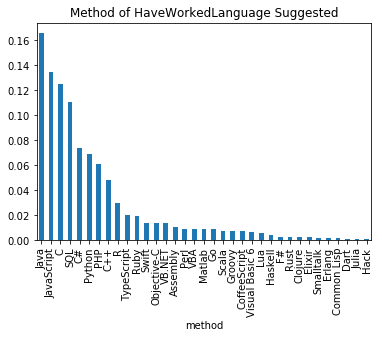

In [33]:
def clean_and_plot(df,possible_vals,column, plot=True):
    '''
    INPUT 
        df - a dataframe holding the CousinEducation column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the CousinEducation column.
    '''
    title='Method of '+ column+ ' Suggested'
    study = df[column].value_counts().reset_index()
    study.rename(columns={'index': 'method', column: 'count'}, inplace=True)
    study_df = h.total_count('method', 'count', possible_vals, study)

    
    study_df.set_index('method', inplace=True)
    if plot:
        (study_df/study_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_study_df = study_df/study_df.sum()
    return props_study_df
    
have_props_df = clean_and_plot(df,have_possible_vals,'HaveWorkedLanguage')

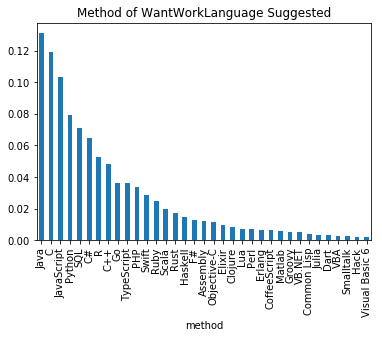

In [34]:
want_props_df = clean_and_plot(df,want_possible_vals,'WantWorkLanguage')

In [35]:
have_props_df.sort_values(by = 'count', ascending =False )

,count
method,
Java,0.165675
JavaScript,0.134634
C,0.124617
SQL,0.110379
C#,0.073429
Python,0.068886
PHP,0.060563
C++,0.047997
R,0.029728


In [36]:
want_props_df.sort_values(by = 'count', ascending =False )

,count
method,
Java,0.131235
C,0.119135
JavaScript,0.103326
Python,0.079550
SQL,0.070987
C#,0.064469
R,0.052603
C++,0.048394
Go,0.036516


## Q2. Is graduate from computer related field have higher salary? 'MajorUndergrad' compare to salary?

Text(0, 0.5, 'salary')

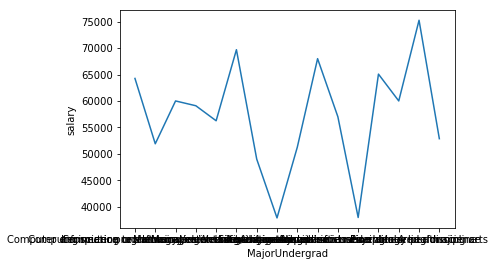

In [92]:
MajorUndergrad = df_q2.MajorUndergrad.unique()
salary = df_q2.groupby('MajorUndergrad')['Salary'].median()
plt.plot(MajorUndergrad, salary)
plt.xlabel('MajorUndergrad')
plt.ylabel('salary')

In [93]:
salary.sort_values()

MajorUndergrad
Computer programming or Web development                         37867.965368
Information technology, networking, or system administration    37947.540984
Computer engineering or electrical/electronics engineering      48997.772829
Computer science or software engineering                        51250.000000
A health science                                                51893.939394
Something else                                                  52859.237537
A non-computer-focused engineering discipline                   56250.000000
I never declared a major                                        57001.410986
A natural science                                               59090.909091
A humanities discipline                                         60000.000000
Mathematics or statistics                                       60000.000000
A business discipline                                           64258.064516
Management information systems                               

In [97]:
df_q2.groupby('MajorUndergrad')['Respondent'].count().sort_values()

MajorUndergrad
A health science                                                  21
Psychology                                                        53
I never declared a major                                         162
A social science                                                 165
Management information systems                                   182
Fine arts or performing arts                                     195
A business discipline                                            222
Something else                                                   274
A humanities discipline                                          278
A non-computer-focused engineering discipline                    425
Mathematics or statistics                                        447
Information technology, networking, or system administration     477
A natural science                                                491
Computer programming or Web development                          992
Computer engineerin

### Q3. What country has the highest average salary per professional?
The Salary data only availble for `Professional developer`.

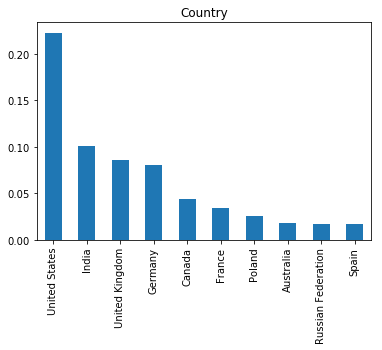

In [55]:
count_vals = df.Country.value_counts()
(count_vals[:10]/df.shape[0]).plot(kind="bar");
plt.title("Country");

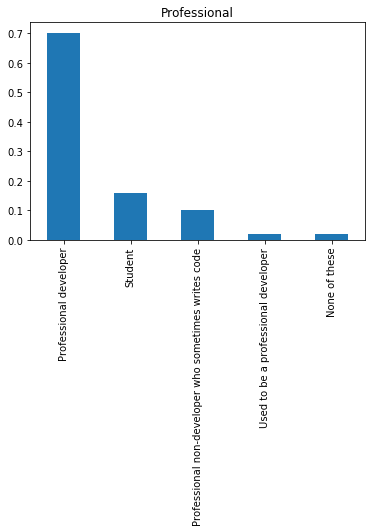

In [68]:
count_vals = df.Professional.value_counts()
(count_vals[:10]/df.shape[0]).plot(kind="bar");
plt.title("Professional");

In [98]:
pd.DataFrame(df.query("Salary >= 1").groupby(['Professional', 'Country']).median()['Salary'].sort_values())

Salary
Professional           Country                                   
Professional developer Cambodia                        500.000000
                       Cuba                            560.000000
                       Zimbabwe                        700.000000
                       Kazakhstan                     1000.000000
                       Yemen                          1000.000000
                       Egypt                          2823.500000
                       Myanmar                        3021.150004
                       Nepal                          3450.000000
                       Azerbaidjan                    3500.000000
                       Syria                          4250.000000
                       Sri Lanka                      4793.500000
                       Zaire                          4800.000000
                       Bangladesh                     5261.839138
                       Pakistan                       5776.717557
                       Tanzania                       6000.000000
                       Mongolia                       6000.000000
                       Tunisia                        6000.000000
                       Nigeria                        6000.000000
                       Philippines                    6242.431466
                       Iran                           7038.340433
                       India                          7341.065923
                       Georgia                        8000.000000
                       Venezuela                      8000.000000
                       Indonesia                      8077.181961
                       Malaysia                       9484.304933
                       Ukraine                        9650.333333
                       Montenegro                    10537.634409
                       Bolivia                       10641.000000
                       Morocco                       10752.688172
                       Colombia                      11736.293147
...                                                           ...
                       Ghana                         47287.000000
                       Guatemala                     48000.000000
                       Netherlands                   48387.096774
                       Cyprus                        48387.096774
                       United Kingdom                48750.000000
                       Sweden                        49886.877828
                       Germany                       52903.225806
                       Canada                        53030.303030
                       Reunion (French)              53763.440860
                       Cayman Islands                57317.000000
                       New Zealand                   60714.285714
                       Ireland                       62365.591398
                       Nicaragua                     65000.000000
                       Denmark                       66597.435897
                       Australia                     67045.454545
                       Guinea                        70000.000000
                       Israel                        70000.000000
                       Norway                        71770.334928
                       Bahrain                       75000.000000
                       Guam                          78800.000000
                       Liechtenstein                 79300.000000
                       Iceland                       80645.161290
                       Switzerland                   90000.000000
                       United States                 93000.000000
                       Anguilla                     100000.000000
                       Kuwait                       115200.000000
                       Uganda                       120000.000000
                       U.S. Minor Outlying Islands  136000.000000
                       Bermuda   

In [ ]:
########################################################################################

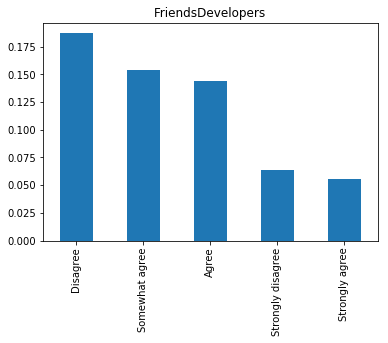

In [108]:
count_vals = df.FriendsDevelopers.value_counts()
(count_vals[:10]/df.shape[0]).plot(kind="bar");
plt.title("FriendsDevelopers");